## Comenzamos creando nuestro datarame e importando librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [16]:
df=pd.read_csv("Diabetes.csv")
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52,4.0,4.2905,80,135


Age and sex are self-explanatory

BMI is body mass index

BP is average blood pressure

S1 through S6 are different blood measurements

Y is the qualitative measure of disease progression over one year

### Lets study the dataset using methods of probability and statistics

##### Task 1: Compute mean values and variance for all values

In [18]:
df.describe()
#De esto podemos rescatar que los princioales datos con mayor dispercion entre sus medidas son la Y,S2 Edad y BloodPreassure


,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.787330,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934863,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


##### Task 2: Plot boxplots for BMI, BP and Y depending on gender

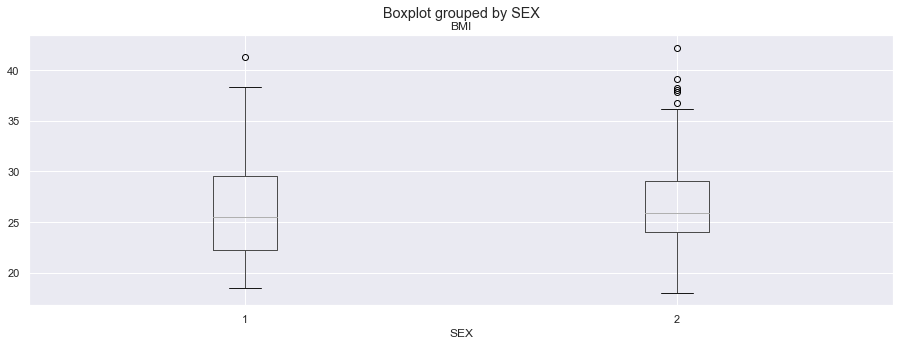

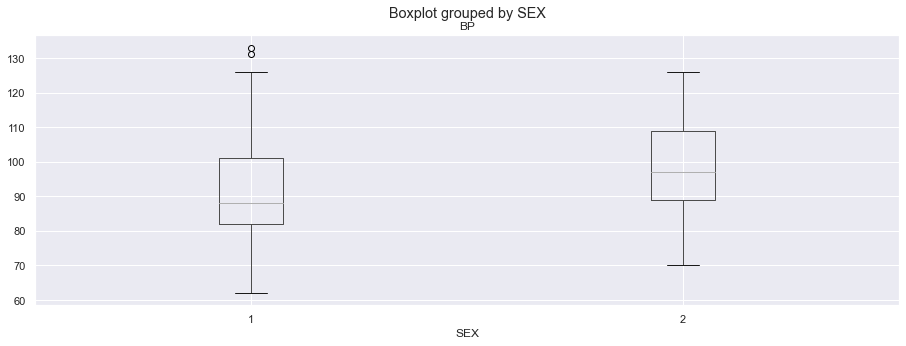

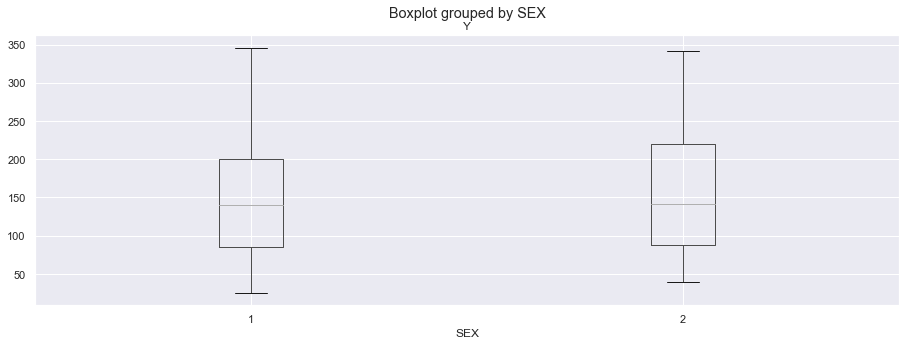

In [5]:
for colum in ['BMI','BP','Y']:
    df.boxplot(colum, by='SEX',figsize=(15,5))
    plt.show()
#La media del indice de masa corporal de los hombres es mayor, los datos se concentran más entre 24 a 28 aprox
# los valores por debajo de 24 aprox se encuentran en el 25 de los datos de hombres
# para el caso de las mujeres el indice de masa corporal es menor, los datos se concentran más entre 22 a 29 aprox
# los valores por debajo de 22 aprox se encuentran en el 25 de los datos de mujeres

#### Task 3: What is the the distribution of Age, Sex, BMI and Y variables?


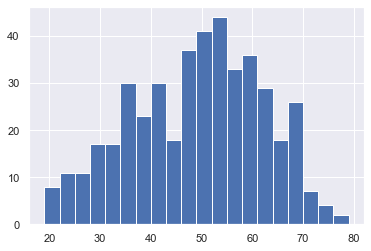

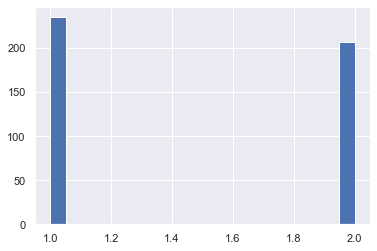

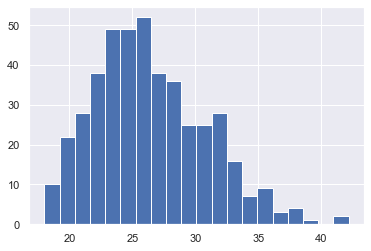

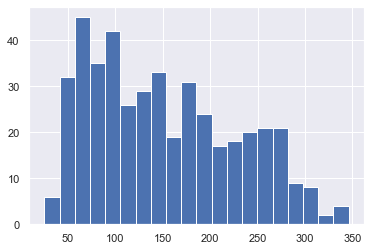

In [6]:
for variables in [df['AGE'],df['SEX'],df['BMI'],df['Y']]:
    plt.hist(variables,bins=20)
    plt.show()

    #De Age es mas parecida a una distribucion normal
    #De SEX es uniforme
    #De BMI parecida a distribucion normal cargada a la izquierda
    #de tipo distribucion aleatoria

#### Task 4: Test the correlation between different variables and disease progression (Y)


          AGE       SEX       BMI        BP        S1        S2        S3  \
AGE  1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075200   
SEX  0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.378988   
BMI  0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366725   
BP   0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178831   
S1   0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051542   
S2   0.219243  0.142637  0.261170  0.185548  0.896663  1.000000 -0.196469   
S3  -0.075200 -0.378988 -0.366725 -0.178831  0.051542 -0.196469  1.000000   
S4   0.203841  0.332115  0.413807  0.257650  0.542207  0.659817 -0.738464   
S5   0.270774  0.149916  0.446157  0.393480  0.515503  0.318357 -0.398476   
S6   0.301731  0.208133  0.388680  0.390430  0.325717  0.290600 -0.273697   
Y    0.187889  0.043062  0.586450  0.441482  0.212022  0.174054 -0.394653   

           S4        S5        S6         Y  
AGE  0.203841  0.270774  0.30

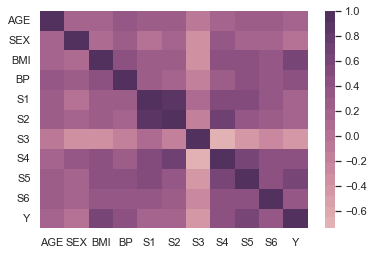

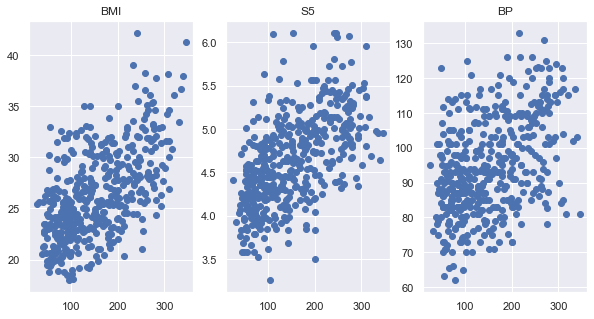

In [25]:
print(df.corr())
import seaborn as sns
sns.heatmap(df.corr(),cmap=sns.cubehelix_palette(20, light=0.75, dark=0.25),)
fig, ax = plt.subplots(1,3,figsize=(10,5))
for i,n in enumerate(['BMI','S5','BP']):
    ax[i].scatter(df['Y'],df[n])
    ax[i].set_title(n)
plt.show()
    #La mayor correlacion entre los datos se ve entre el indice de masa corporal,S5 y la progresion de la enfermedad

#### Task 5: Test the hypothesis that the degree of diabetes progression is different between men and women

In [17]:
from scipy.stats import ttest_ind

tval, pval = ttest_ind(df.loc[df['SEX']==1,['Y']], df.loc[df['SEX']==2,['Y']],equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")
#P nos indica un valor bajo, por lo que la probabilidad de que la media de los sexos con respecto al avance de la enfermedad
# es bajo en coincidir entre ambos sexos, con lo que se comprueba la hipotesis de que es distinto
#Conclusion: p-value close to 0 (typically, below 0.05) would indicate high confidence in our hypothesis.
#  In our case, there is no strong evidence that sex affects progression of diabetes

T-value = -0.90
P-value: 0.3674449793083975
